# EE2211 Tutorial 7

### by Chua Dingjuan (Oct 2022)

## Question 2 Python Codes

### 2(a) Use the polynomial model from orders 1 to 6 to train and test the data without regularization. 

### Plot the Mean Squared Errors (MSE) over orders from 1 to 6 for both the training and the test sets. Which model order provides the best MSE in the training and test sets? Why? [Hint: the underlying data was generated using a quadratic function + noise]


No Regularization :::
Training MSE [2.3070729253981557, 0.008440835471198288, 0.008302615907049128, 0.0017347778137363496, 1.7665941820312314e-25, 6.401136148106856e-17]
Test MSE [3.0006478167488617, 0.029594585750404308, 0.030111281823536718, 0.08535502039489846, 1.0548239880452477, 10.767366473417336]


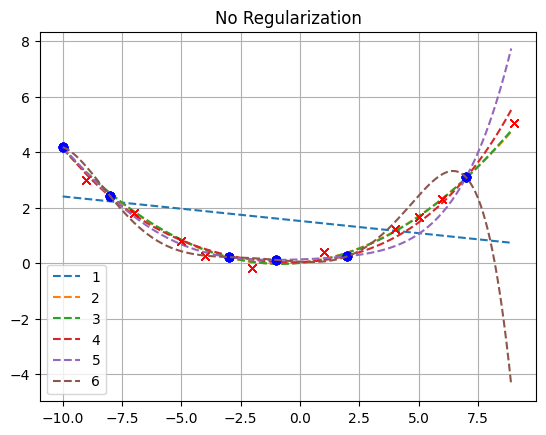

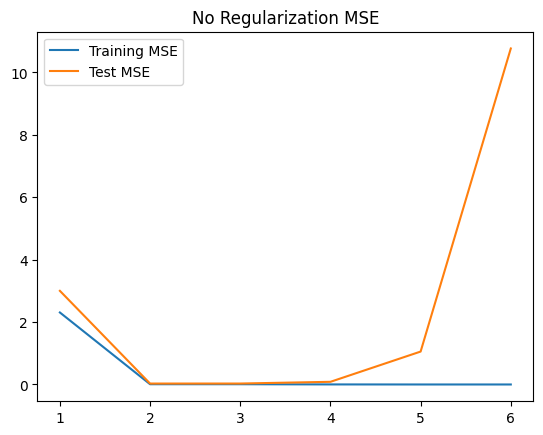

In [3]:
#Question 2(a) - NO REGULARIZATION##

#Generate polynomial matrix P using the following functions from sklearn.preprocessing.PolynomialFeatures
from sklearn.metrics import mean_squared_error as skmse
from sklearn.preprocessing import PolynomialFeatures as skpf

for order in range(1,7):

    #step 1, create a polynomial function object class with the right degree
    polyfn = skpf(order)

    #step 2, fit the polyfn to your actual data and test data.
    P = polyfn.fit_transform(x)
   
    #step 3, solving for coefficients of regression polynomial 
    if (P.shape[0] >= P.shape[1]) :
        w = np.linalg.inv(P.T @ P) @ P.T @ y

    else : #P.shape[0] < P.shape[1], underdetermined systems
        w = P.T @ np.linalg.inv(P @ P.T) @ y


    #step 4, using regression coefficients to calculate predicted values of y
    Ptest = polyfn.fit_transform(xtest)

    y_reg = P @ w
    ytest_reg= Ptest @ w

    #step 5, calculating mse error for this order
    #from sklearn.metrics import mean_squared_error as skmse

    trainingmse.append(skmse(y,y_reg))
    testmse.append(skmse(ytest,ytest_reg))
    
    
    #--- Plotting---#
    plt.figure(1)
    plt.title('No Regularization')

    plt.plot(x,y,'bo')
    plt.plot(xtest,ytest,'rx')

    xline= np.arange(min(np.concatenate((x,xtest))),max(np.concatenate((x,xtest))),0.1)
    xline_reshaped = xline.reshape((len(xline),1))
    Pline = polyfn.fit_transform(xline_reshaped)
    yline=Pline @ w
    plt.plot(xline,yline,'--',  label=order)
    plt.legend()
plt.grid()
print ("No Regularization :::")
print ("Training MSE", trainingmse)
print ("Test MSE", testmse)

plt.figure(2)
plt.title('No Regularization MSE')
plt.plot(np.arange(1,7),trainingmse,label="Training MSE")
plt.plot(np.arange(1,7),testmse,label="Test MSE")
plt.legend()

### 2(b) Use regularization (ridge regression) λ=1 for all orders and repeat the same analyses. Compare the plots of (a) and (b). What do you see? [Hint: the underlying data was generated using a quadratic  function + noise]

With Regularization :::
Training MSE [2.3585531011197105, 0.008456477077018427, 0.008356013483798866, 0.0018079762223900304, 0.0007264963729959428, 0.0001934784616403095]
Test MSE [3.2755677280832316, 0.030169873887064814, 0.03141714830425406, 0.0939314269840105, 0.4368968008234161, 6.020235943061975]


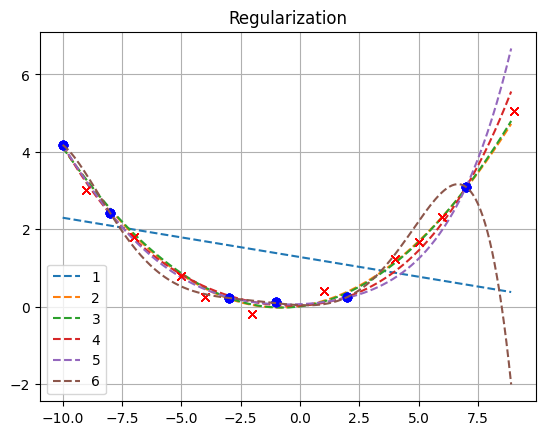

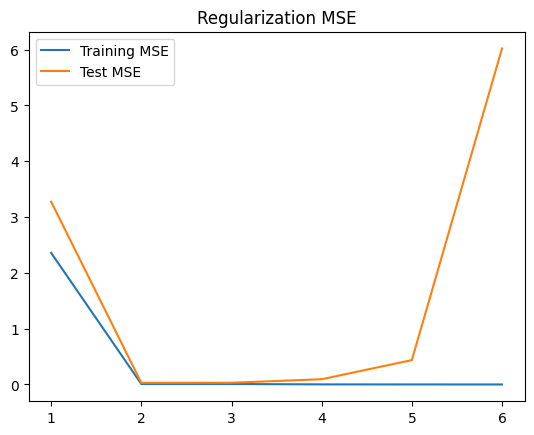

In [4]:
##Question 2(b) - REGULARIZATION##

trainingmse=[]
testmse=[]
reglambda=1

for order in range(1,7):

    #step 1, create a polynomial function object class with the right degree
    polyfn = skpf(order)

    #step 2, fit the polyfn to your actual data and test data.
    P = polyfn.fit_transform(x)
   
    #step 3, solving for coefficients of regression polynomial 
    w = np.linalg.inv(P.T @ P + np.identity(len(P.T))) @ P.T @ y

    #step 4, using regression coefficients to calculate predicted values of y
    Ptest = polyfn.fit_transform(xtest)

    y_reg = P @ w
    ytest_reg= Ptest @ w

    #step 5, calculating mse error for this order
    #from sklearn.metrics import mean_squared_error as skmse

    trainingmse.append(skmse(y,y_reg))
    testmse.append(skmse(ytest,ytest_reg))
    
    
    #--- Plotting---#
    plt.figure(3)
    plt.title('Regularization')

    plt.plot(x,y,'bo')
    plt.plot(xtest,ytest,'rx')

    xline= np.arange(min(np.concatenate((x,xtest))),max(np.concatenate((x,xtest))),0.1)
    xline_reshaped = xline.reshape((len(xline),1))
    Pline = polyfn.fit_transform(xline_reshaped)
    yline=Pline @ w
    plt.plot(xline,yline,'--',  label=order)
    plt.legend()
plt.grid()
print ("With Regularization :::")
print ("Training MSE", trainingmse)
print ("Test MSE", testmse)

plt.figure(4)
plt.title('Regularization MSE')
plt.plot(np.arange(1,7),trainingmse,label="Training MSE")
plt.plot(np.arange(1,7),testmse,label="Test MSE")
plt.legend()


plt.show()

